# Convolutional Neural Network
## Dataset: Fashion MNIST

### Explore data

In [7]:
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [2]:
print("Shape of training set:", X_train.shape, y_train.shape)
print("Shape of testing set:", X_test.shape, y_test.shape)
print("Number of classes:", len(np.unique(y_train)))


Shape of training set: (60000, 28, 28) (60000,)
Shape of testing set: (10000, 28, 28) (10000,)


In [3]:
# first image
print("Feature:", X_train[0])
print("Label:", y_train[0])

Feature: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 2

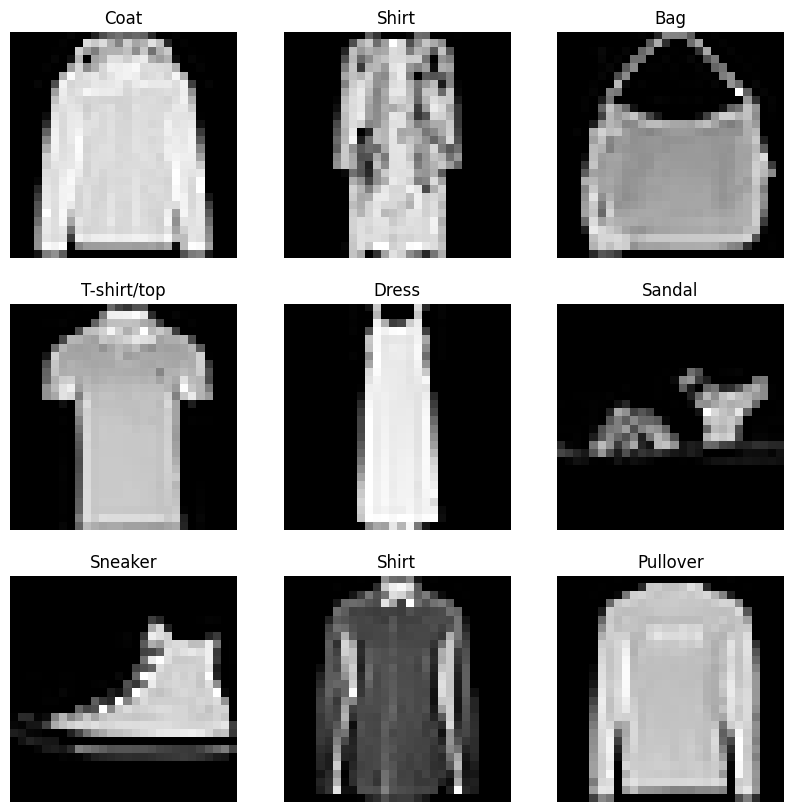

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# define labels
labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}
# plot
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for row in range(3):
    for col in range(3):
        rand_index = np.random.randint(0, len(y_train))
        ax[row, col].imshow(X_train[rand_index], cmap='gray')
        ax[row, col].axis('off')
        ax[row, col].set_title(labels[y_train[rand_index]])
plt.show()

### Preprocessing

In [8]:
# normalise data
# smaller number, faster computation
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [9]:
# reshape data for keras (width, height, channel)
w, h = 28, 28
X_train = X_train.reshape(X_train.shape[0], w, h, 1)
X_test = X_test.reshape(X_test.shape[0], w, h, 1)

In [10]:
# one hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### Create CNN

In [11]:
# using keras sequential
# model has convolutional layer followed by max pooling layer, flatten layer, dense layer ending with dense layer with softmax activation fn which corresponds to 10 classes
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=[w, h, 1]),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
from tensorflow.keras.callbacks import EarlyStopping

impatience = EarlyStopping(monitor='val_loss', patience=3)
num_epochs = 20

# train the model using early stopping
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs, batch_size=32, verbose=0, callbacks=[impatience])

### Model evaluation

In [14]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {scores[0]}")
print(f"Test accuracy: {scores[1]}")

Test loss: 0.2872651219367981
Test accuracy: 0.9194999933242798


In [15]:
# test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

313/313 [==============================] - 2s 5ms/step


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.91      0.88      1000
           3       0.91      0.93      0.92      1000
           4       0.85      0.86      0.85      1000
           5       0.99      0.99      0.99      1000
           6       0.83      0.71      0.76      1000
           7       0.95      0.98      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.99      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



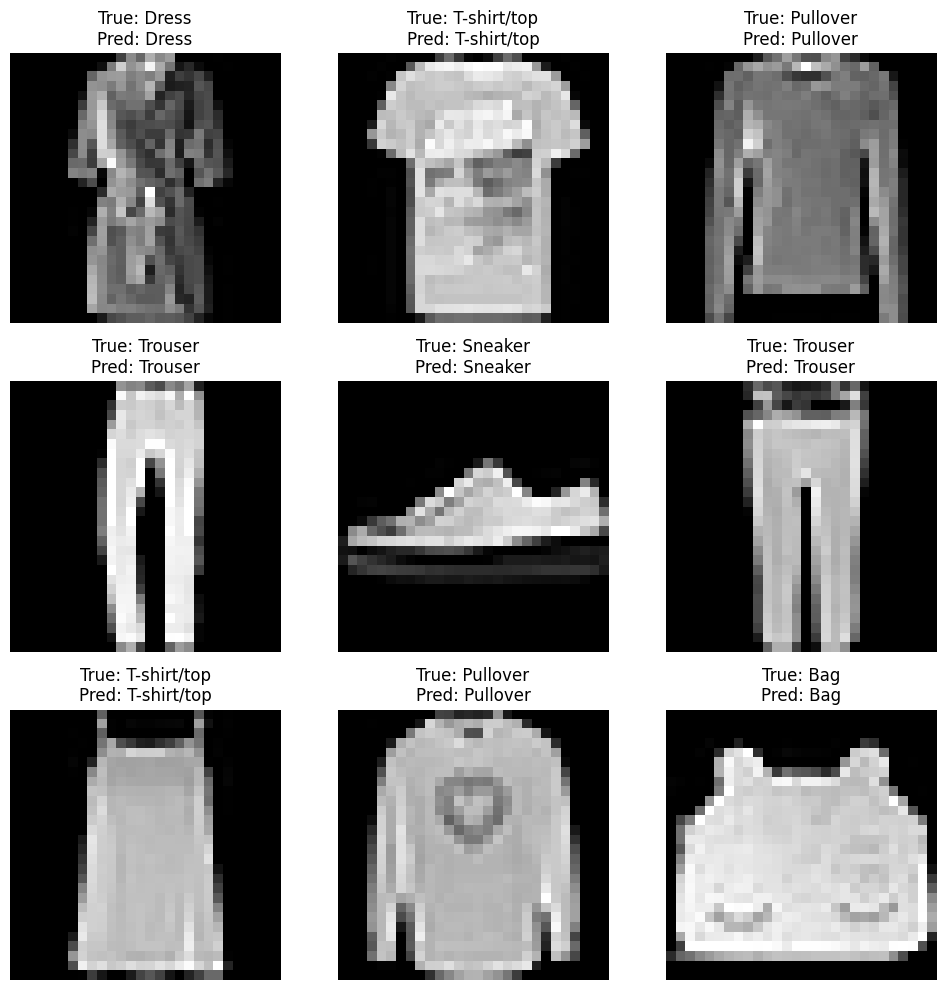

In [17]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for row in range(3):
    for col in range(3):
        rand_index = np.random.randint(0, len(y_test))
        ax[row, col].imshow(X_test[rand_index].reshape(28, 28), cmap='gray')
        ax[row, col].axis('off')
        true_label = labels[y_true_classes[rand_index]]
        pred_label = labels[y_pred_classes[rand_index]]
        ax[row, col].set_title(f"True: {true_label}\nPred: {pred_label}")
plt.tight_layout()
plt.show()